# Data Exploration
In this notebook, we focus on the exploratory data analysis on MovieLens 100k, which is the dataset collected via MovieLens web site during 1990s. Specifically, we gonna explore raw data first to better understand the data and display their corresponding distributions. Then, we intend to make several graphs to find out some hidden network structures based on our processed data.

## Data Acquisition
For this project, we are working with the dataset, [MovieLens 100k](https://grouplens.org/datasets/movielens/100k/), from GroupLens Research Project at the University of Minnesota. 

This data set consists of: 
- 100,000 ratings (1-5) from 943 users on 1682 movies. 
- Each user has rated at least 20 movies. 
- Simple demographic info for the users (age, gender, occupation and zip code)

The data was collected through the MovieLens web site (movielens.umn.edu) during the seven-month period from September 19th, 1997 through April 22nd, 1998. This data has been cleaned up - users who had less than 20 ratings or did not have complete demographic information were removed from this data set. For more detailed description of the files about our dataset, we suggest readers to check out `README.txt` [here](http://files.grouplens.org/datasets/movielens/ml-100k-README.txt).

## Exploratory Data Analysis
Now, let's dive into this dataset and begin our exploration!

In [1]:
# import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
import networkx as nx
import nxviz as nv
from wordcloud import WordCloud
from matplotlib import cm

%matplotlib inline

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw = True)

In [2]:
# load rating and user data
data = pd.read_csv('ml-100k/u.data', sep = '\t', header = None)
user = pd.read_csv('ml-100k/u.user', sep = '|', header = None)
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
display_side_by_side(data.head(), user.head())

user id 
 movie id 
 rating 
 timestamp 
 
 
 
 
 0 
 196 
 242 
 3 
 881250949 
 
 
 1 
 186 
 302 
 3 
 891717742 
 
 
 2 
 22 
 377 
 1 
 878887116 
 
 
 3 
 244 
 51 
 2 
 880606923 
 
 
 4 
 166 
 346 
 1 
 886397596 
 
 
 
 
 
 
 user id 
 age 
 gender 
 occupation 
 zip code 
 
 
 
 
 0 
 1 
 24 
 M 
 technician 
 85711 
 
 
 1 
 2 
 53 
 F 
 other 
 94043 
 
 
 2 
 3 
 23 
 M 
 writer 
 32067 
 
 
 3 
 4 
 24 
 M 
 technician 
 43537 
 
 
 4 
 5 
 33 
 F 
 other 
 15213

In [3]:
# load movie data
item = pd.read_csv('ml-100k/u.item', sep = '|', header = None, encoding='latin-1')
item.columns = ['movie id', 'movie title', 'release date', 'video release date',
              'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
              "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']
item.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [4]:
# merge all rating, user and movie data
data = (pd.merge(data, user)).merge(item)
data.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [5]:
new_area = np.zeros((len(np.unique(data['movie id'])), len(item.columns)-5))
for movie_id in range(1, len(np.unique(data['movie id']))+1):
    movie_area = data[data['movie id'] == movie_id]
    genres_id = movie_area.iloc[:, 12:]
    vote = np.sum(genres_id, axis=0)
    
    for i in range(len(vote)):
        if vote[i]>0:
            new_area[movie_id-1, i]=1

new_area.shape

(1682, 19)

In [6]:
mt = pd.DataFrame.from_dict(new_area)
mt.index = np.unique(data['movie id'])
new_data = pd.DataFrame(mt.values, columns = item.columns[5:])
new_data.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


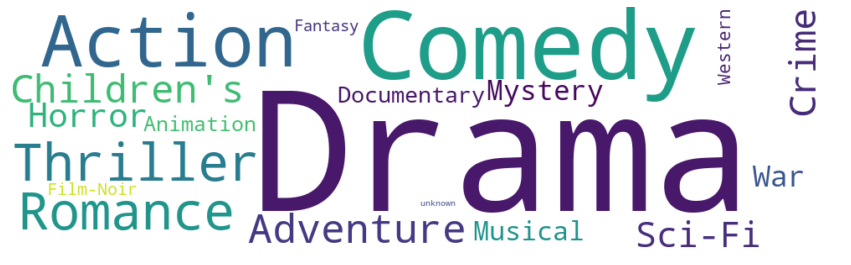

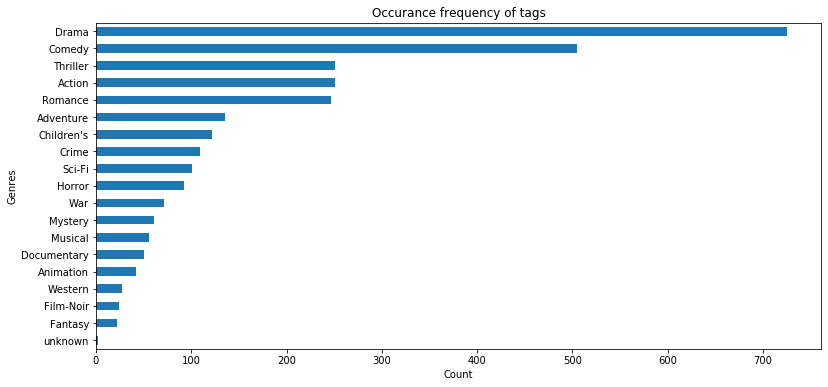

In [7]:
result = np.sum(new_data, axis=0)
fig = plt.figure(1, figsize=(15,12))
# Generate a word cloud image
wordcloud = WordCloud(width=1000,height=300, max_font_size=200, background_color='white').generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

fig = plt.figure(1, figsize=(13,6))
result.sort_values()[-19:].plot(kind = 'barh', title = 'Occurance frequency of tags')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=20)
plt.show()

### Top ratings
First, we start examining which movies have been rated the most.  

movie title
Independence Day (ID4) (1996)    429
Air Force One (1997)             431
Toy Story (1995)                 452
Scream (1996)                    478
English Patient, The (1996)      481
Liar Liar (1997)                 485
Return of the Jedi (1983)        507
Fargo (1996)                     508
Contact (1997)                   509
Star Wars (1977)                 583
dtype: int64

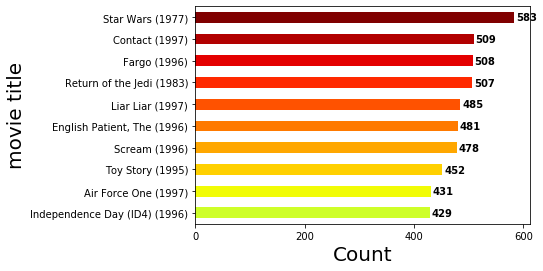

In [8]:
# top 10 rated movies
fig1=plt.figure()
top_10_rated = data.groupby('movie title').size().sort_values()[-10:]
display(top_10_rated)

# plot
top_10_rated.plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.6, 1, 10) ])

for i, v in enumerate(top_10_rated):
    plt.text(v + 3, i-0.15 , str(v), color='black', fontweight='bold')
plt.xlabel('Count')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.show()
fig1.savefig('top_10_rated.png', bbox_inches = 'tight')

From the bar chart, we could see that most rated movies are those in the recent time when the MovieLens Project is in progress. (i.e. Most rated movies are from the years after 1995.) 

Besides examining most rated movies, we would like to check which movies have highest mean ratings.

rating          
                                   size      mean
movie title                                      
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929

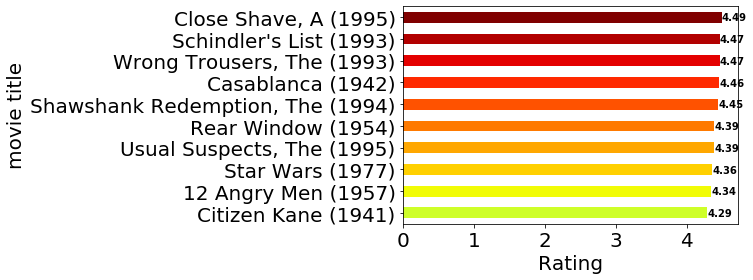

In [9]:
# top 10 movies with highest mean ratings
fig2 = plt.figure()
high_rating = data.groupby('movie title').agg({'rating': [np.size, np.mean]})
high_rating_new = high_rating[high_rating.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = False).head(10)
display(high_rating_new)

# plot
high_rating_1 = (high_rating[high_rating.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = True))\
                        .rating['mean'][-10:]
(high_rating[high_rating.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = True))\
                        .rating['mean'][-10:]\
                        .plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.6, 1, 10) ])

for i, v in enumerate(high_rating_1):
    plt.text(v , i-0.15 , str(np.round(v,2)), color='black', fontweight='bold')
    
plt.xlabel('Rating')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=30)
plt.show()
fig2.savefig('highest_rating.png', bbox_inches = 'tight')


To get more objective mean rating, notice that we only consider the movies which have been rated beyond 100 times by users.

### Age difference
Next, we are going to see the users' age distribution (normalized one).

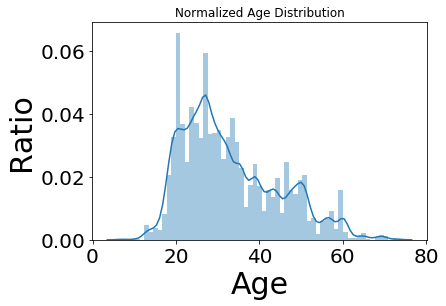

In [10]:
# user age distribution
sns.distplot(data.age, bins = len(data.age.unique()))
plt.xlabel("Age")
plt.ylabel("Ratio")
plt.title("Normalized Age Distribution")
plt.show()

From this distribution, we oberve that the majority of users are young adults with their ages from 20 to 40. The following is their top 10 choice of the movies.

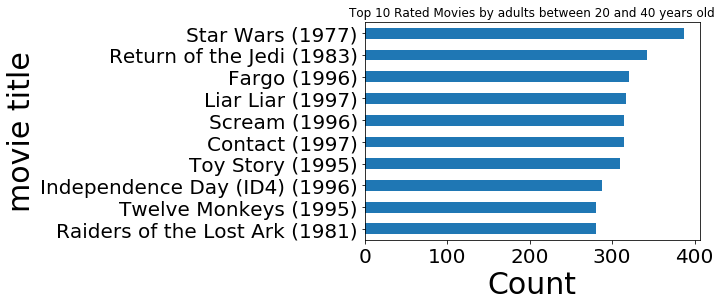

In [11]:
pd_adult = data.loc[(data['age'] >= 20) & (data['age'] < 40)]
# top 10 rated movies rated by young adults
top_10_rated_you = pd_adult.groupby('movie title').size().sort_values()[-10:]
top_10_rated_you.plot(kind = 'barh', title = 'Top 10 Rated Movies by adults between 20 and 40 years old')
plt.xlabel('Count')
plt.show()

### Gender difference
We are also interested in whether there is rating difference between male and female users.

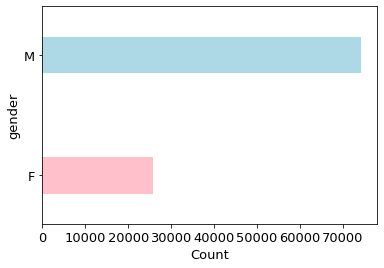

In [12]:
# rating based on gender
# frequency
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)
fig3 = plt.figure(figsize= [6, 4])
freq_gender = data.groupby('gender').size()
freq_gender.plot(kind = 'barh', color = ['pink', 'lightblue'], width=0.3)
plt.xlabel('Count')
plt.show()
fig3.savefig('gender_fre.png', bbox_inches = 'tight')

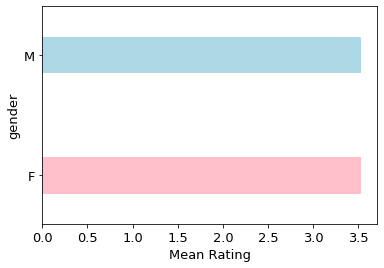

In [13]:
# mean rating
fig4 = plt.figure(figsize= [6, 4])
mean_rating_gender = data.groupby('gender').rating.mean()
mean_rating_gender.plot(kind = 'barh', color = ['pink', 'lightblue'], width=0.3)
plt.xlabel('Mean Rating')
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13)
plt.rc('axes', labelsize=13)
plt.show()
fig4.savefig('gender_rating.png', bbox_inches = 'tight')

According to our data, there are more male users than female users. However, we surprisingly notice that there is no rating difference between men and women.

Then we would like to see if there are some differences towards the top rated movies, the top ratings and the preference of genres between men and women.

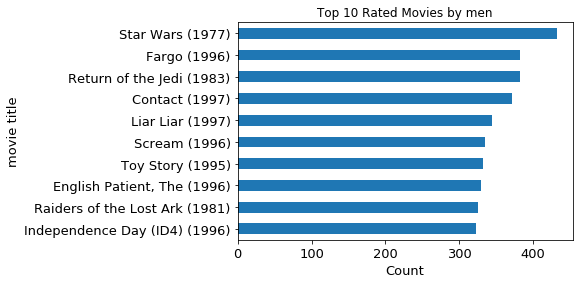

In [14]:
# choose a field with only men
my_field = "M"
pd_field = data[data['gender'] == my_field]

# top 10 rated movies rated by men
top_10_rated_men = pd_field.groupby('movie title').size().sort_values()[-10:]
top_10_rated_men.plot(kind = 'barh', title = 'Top 10 Rated Movies by men')
plt.xlabel('Count')
plt.show()

rating          
                                   size      mean
movie title                                      
Casablanca (1942)                   188  4.473404
Shawshank Redemption, The (1994)    219  4.410959
Schindler's List (1993)             219  4.406393
Rear Window (1954)                  155  4.400000
Usual Suspects, The (1995)          213  4.399061

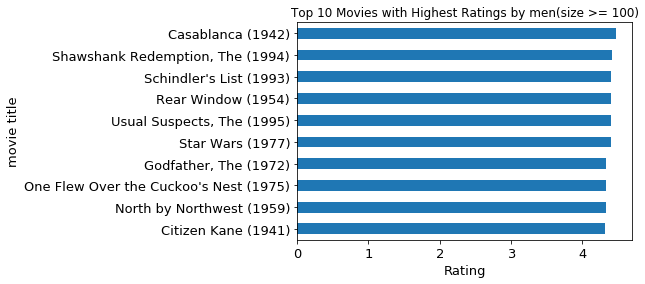

In [15]:
# top 10 movies with highest mean ratings
high_rating_men = pd_field.groupby('movie title').agg({'rating': [np.size, np.mean]})
display(high_rating_men[high_rating_men.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = False).head())

# plot
(high_rating_men[high_rating_men.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = True))\
                        .rating['mean'][-10:]\
                        .plot(kind = 'barh', title = 'Top 10 Movies with Highest Ratings by men(size >= 100)')
plt.xlabel('Rating')
plt.show()

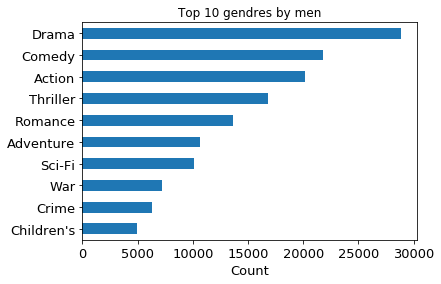

In [16]:
# top 10 gendres by men
top_10_gendres_men = pd_field.iloc[:, 12:].sum().sort_values()[-10:]
top_10_gendres_men.plot(kind = 'barh', title = 'Top 10 gendres by men')
plt.xlabel('Count')
plt.show()

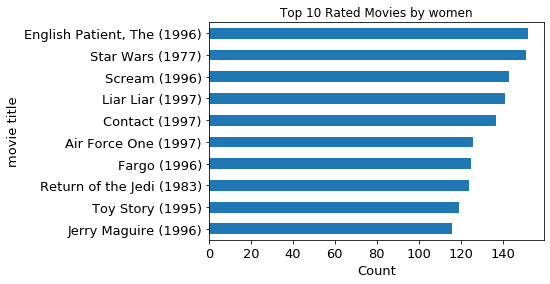

In [17]:
# choose a field with only women
women = "F"
pd_women = data[data['gender'] == women]

# top 10 rated movies rated by men
top_10_rated_women = pd_women.groupby('movie title').size().sort_values()[-10:]
top_10_rated_women.plot(kind = 'barh', title = 'Top 10 Rated Movies by women')
plt.xlabel('Count')
plt.show()

rating          
                                   size      mean
movie title                                      
Silence of the Lambs, The (1991)    100  4.320000
Titanic (1997)                      104  4.278846
Star Wars (1977)                    151  4.245033
Godfather, The (1972)               105  4.133333
Fargo (1996)                        125  4.016000

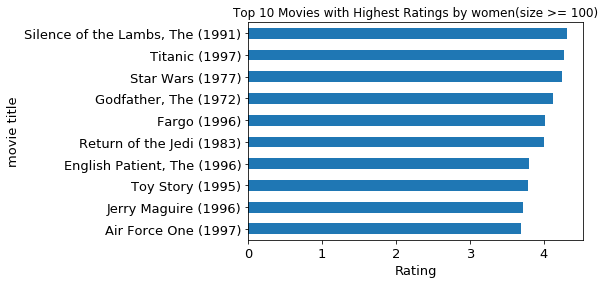

In [18]:
# top 10 movies with highest mean ratings
high_rating_women = pd_women.groupby('movie title').agg({'rating': [np.size, np.mean]})
display(high_rating_women[high_rating_women.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = False).head())

# plot
(high_rating_women[high_rating_women.rating['size'] >= 100].sort_values([('rating', 'mean')],ascending = True))\
                        .rating['mean'][-10:]\
                        .plot(kind = 'barh', title = 'Top 10 Movies with Highest Ratings by women(size >= 100)')
plt.xlabel('Rating')
plt.show()

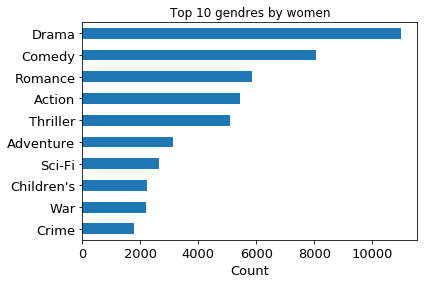

In [19]:
# top 10 gendres by women
top_10_gendres_women = pd_women.iloc[:, 12:].sum().sort_values()[-10:]
top_10_gendres_women.plot(kind = 'barh', title = 'Top 10 gendres by women')
plt.xlabel('Count')
plt.show()

From our results, there are some but not so significate difference between the movies rated by the two genders. However, women seem to be more critical than men concening about rating, the top mean rating from women is about 0.15 lower than that from men. It is also interesting to note that both women and men's favorite motive types are dram and comedy.

### Occupation difference
Aside from the gender among users, we would like to know if there is rating difference among users' various jobs.

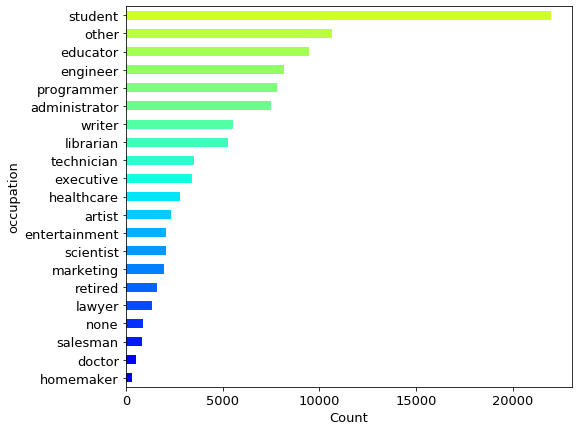

In [20]:
# rating based on occupation
# frequency
fig5 = plt.figure(figsize= [8, 7])
freq_gender = data.groupby('occupation').size()
(freq_gender.sort_values()).plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.1, 0.6, 21) ])

plt.xlabel('Count')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
fig5.savefig('occupation_fre.png', bbox_inches = 'tight')

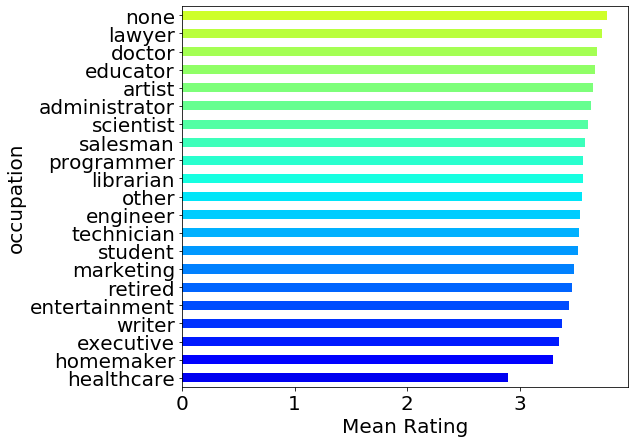

In [21]:
# mean rating
fig6 = plt.figure(figsize= [8, 7])
mean_rating_job = data.groupby('occupation').rating.mean()
(mean_rating_job.sort_values()).plot(kind = 'barh', color = [ cm.jet(x) for x in np.linspace(0.1, 0.6, 21) ])
plt.xlabel('Mean Rating')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.show()
fig6.savefig('occupation_rating.png', bbox_inches = 'tight')

We could see that most ratings are done by students. Nonetheless, students are more picky to give higher rating compared with other high-social-status job roles such as lawyers, doctors, and scientists.

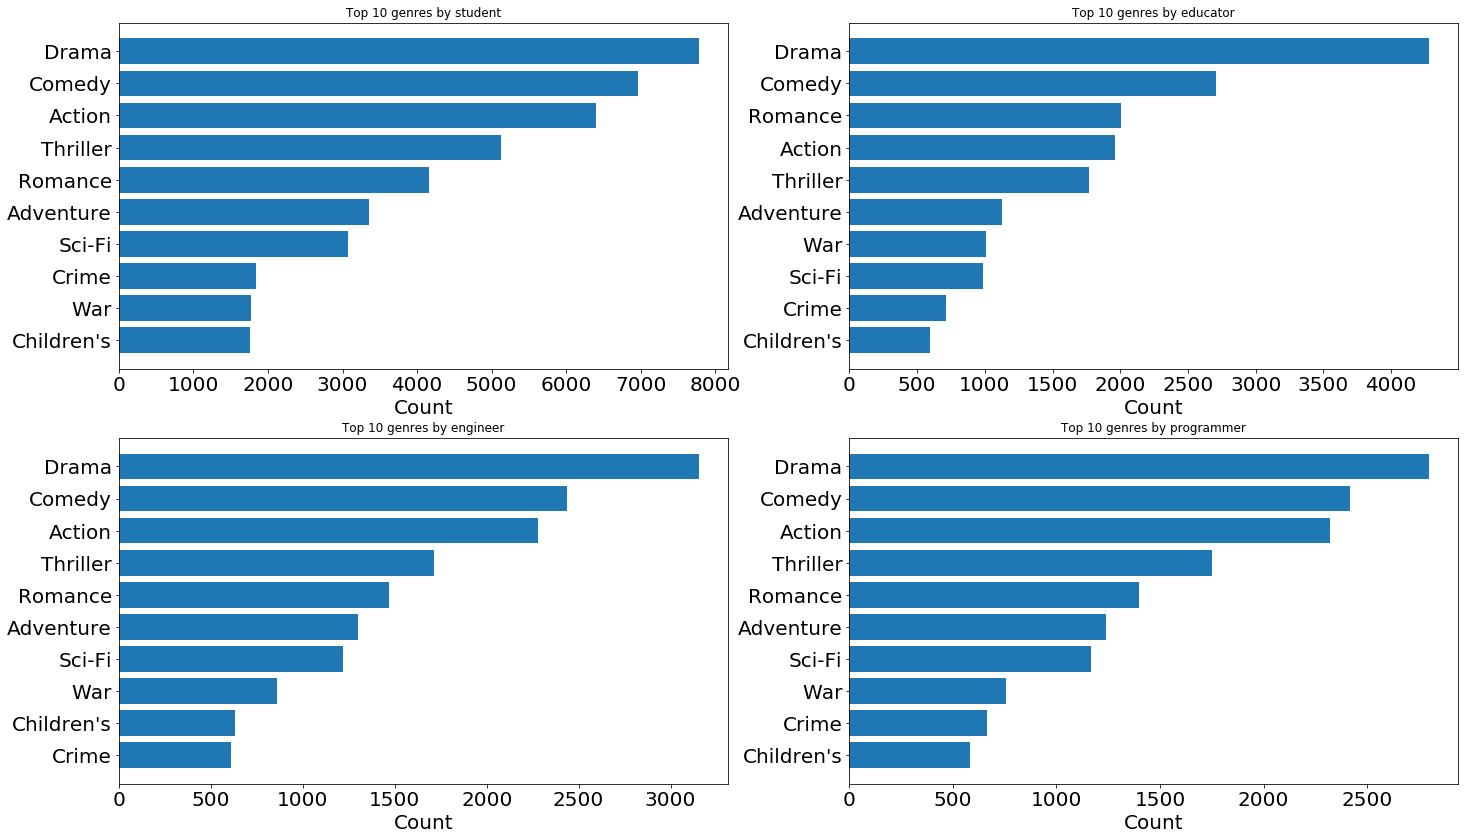

In [22]:
# choose a field with only student
student= "student"
pd_student = data[data['occupation'] == student]

# top 10 gendres by student
top_10_gendres_student = pd_student.iloc[:, 12:].sum().sort_values()[-10:]

# choose a field with only educator
edu= "educator"
pd_edu = data[data['occupation'] == edu]

# top 10 gendres by educator
top_10_gendres_edu = pd_edu.iloc[:, 12:].sum().sort_values()[-10:]

# choose a field with only engineer
eng= "engineer"
pd_eng = data[data['occupation'] == eng]

# top 10 gendres by engineer
top_10_gendres_eng = pd_eng.iloc[:, 12:].sum().sort_values()[-10:]

# choose a field with only programmer
pro= "programmer"
pd_pro = data[data['occupation'] == pro]

# top 10 gendres by programmer
top_10_gendres_pro = pd_pro.iloc[:, 12:].sum().sort_values()[-10:]

fig = plt.figure(1, figsize=(24,14))
ax1 = fig.add_subplot(2,2,1)

index_stu = top_10_gendres_student.sort_values()[-19:].index
objects1 = (index_stu)
y_pos_stu = np.arange(len(top_10_gendres_student.sort_values()[-19:]))
ax1.barh(y_pos_stu, top_10_gendres_student)
plt.title('Top 10 genres by student')
plt.yticks(y_pos_stu, objects1)
plt.xlabel('Count')

ax2 = fig.add_subplot(2,2,2)

index_edu = top_10_gendres_edu.sort_values()[-19:].index
objects2 = (index_edu)
y_pos_edu = np.arange(len(top_10_gendres_edu.sort_values()[-19:]))
ax2.barh(y_pos_edu, top_10_gendres_edu)
plt.title('Top 10 genres by educator')
plt.yticks(y_pos_edu, objects2)
plt.xlabel('Count')

ax3 = fig.add_subplot(2,2,3)

index_eng = top_10_gendres_eng.sort_values()[-19:].index
objects3 = (index_eng)
y_pos_eng = np.arange(len(top_10_gendres_eng.sort_values()[-19:]))
ax3.barh(y_pos_eng, top_10_gendres_eng)
plt.title('Top 10 genres by engineer')
plt.yticks(y_pos_eng, objects3)
plt.xlabel('Count')

ax4 = fig.add_subplot(2,2,4)

index_pro = top_10_gendres_pro.sort_values()[-19:].index
objects3 = (index_pro)
y_pos_pro = np.arange(len(top_10_gendres_pro.sort_values()[-19:]))
ax4.barh(y_pos_pro, top_10_gendres_pro)
plt.title('Top 10 genres by programmer')
plt.yticks(y_pos_pro, objects3)
plt.xlabel('Count')
    
plt.show()

Here we found the top 4 rated group have no big difference in top genres types. drama and comedy are always the top two genres of the movie.

The following are the top appeared genres in all movies.

In [23]:
column_items = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi','Thriller', 'War', 'Western']
new_area = np.zeros((len(np.unique(data['movie id'])), len(column_items)-5))
for movie_id in range(1, len(np.unique(data['movie id']))+1):
    movie_area = data[data['movie id'] == movie_id]
    genres_id = movie_area.iloc[:, 12:]
    vote = np.sum(genres_id, axis=0)
    
    for i in range(len(vote)):
        if vote[i]>0:
            new_area[movie_id-1, i]=1

new_area.shape

(1682, 19)

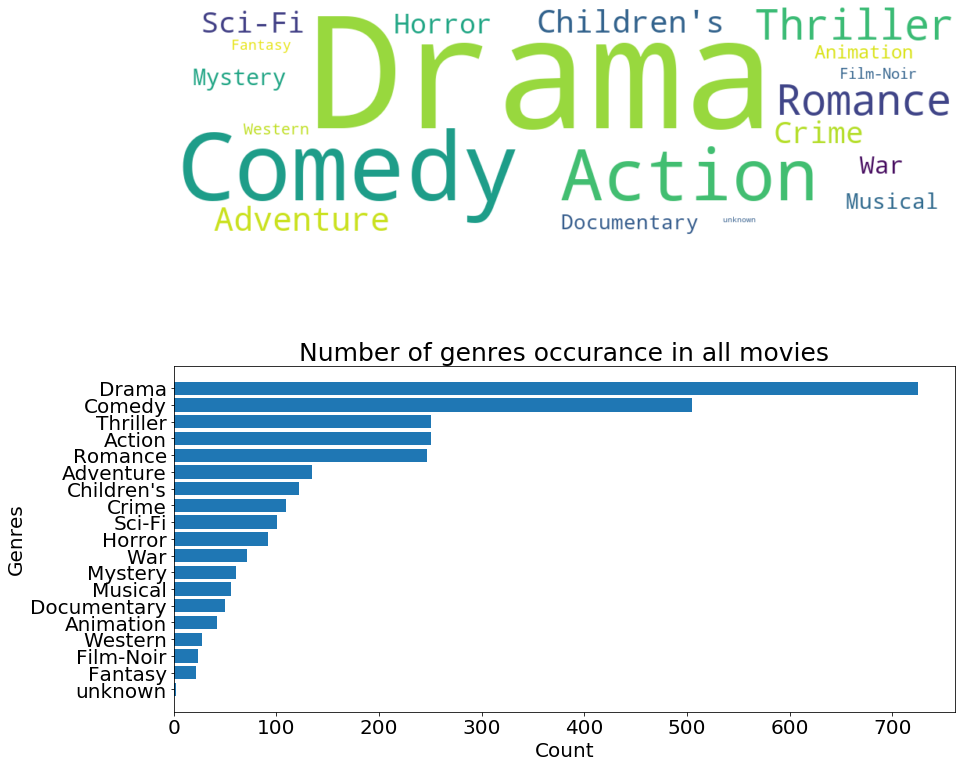

In [24]:
result = np.sum(new_data, axis=0)

fig = plt.figure(1, figsize=(14,14))
axes1 = fig.add_subplot(2,1,1)

# Generate a word cloud image
wordcloud = WordCloud(width=1000,height=300, max_font_size=200, background_color='white').generate_from_frequencies(result)

# Display the generated image:
# the matplotlib way:
axes1.imshow(wordcloud, interpolation='bilinear')
axes1.axis("off")

index = result.sort_values()[-19:].index
objects = (index)
y_pos = np.arange(len(result.sort_values()[-19:]))
axes2 = fig.add_subplot(2,1,2)
axes2.barh(y_pos, result.sort_values()[-19:]);
plt.yticks(y_pos, objects)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('axes', titlesize=20)
plt.title("Number of genres occurance in all movies",fontsize = 25)
plt.show()
fig.savefig('genres_occurance.png', bbox_inches = 'tight')

## Building Graphs
In this section, we gonna construct the movie graph with nodes as movie IDs and edges calculated by movie genres (one-hot vectors). Also, we present some related information about the movie network.

Mean Distance: 1.539987181229317 



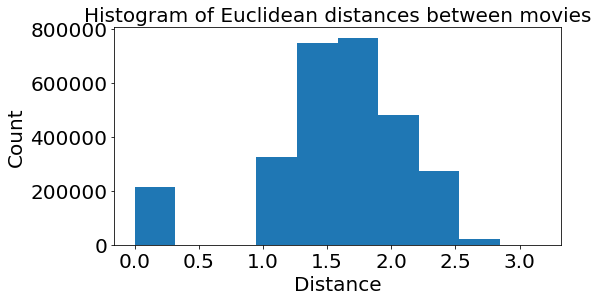

Adjacency Matrix: 
 [[0 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 1 1]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 1 ... 0 0 1]
 [0 0 1 ... 1 1 0]] 

Number of Edges: 642422 



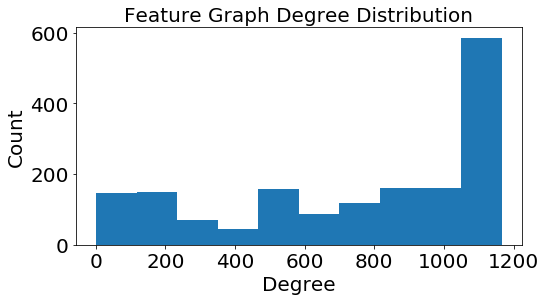


Variance of Feature Graph: 146752.853304415 



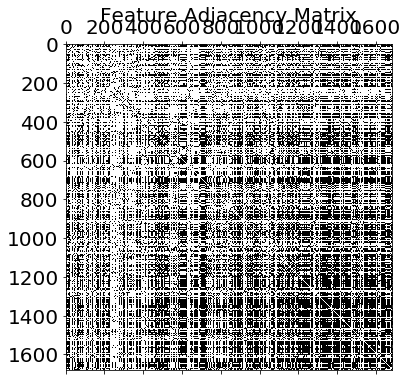

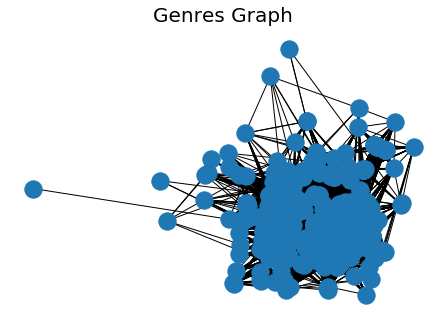

In [25]:
# construct movie graph
## extract genres vector from the list of movies
genres = item.iloc[:, 5:]
genres.index = item['movie id']

## calculate distance matrix 
features = genres.values
distance = np.sum(features**2, axis=1) + np.sum(features**2, axis=1)[:, np.newaxis] - 2 * np.dot(features, features.T)
distance = np.sqrt(distance)

## check mean distance
mean_distance = distance.mean()
print('Mean Distance:', mean_distance, '\n')

## plot the histogram of distance
plt.figure(1, figsize=(8, 4))
plt.hist(distance.flatten());
plt.title("Histogram of Euclidean distances between movies")
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

## create adjacency matrix
threshold = mean_distance
A_feature = np.where(distance < threshold, 1, 0)
np.fill_diagonal(A_feature, 0)
print('Adjacency Matrix: \n', A_feature, '\n')

## check number of edges 
num_edges_feature = int(A_feature.sum() / 2)
print('Number of Edges:', num_edges_feature, '\n')

## plot degree distribution
degrees_feature = A_feature.sum(axis=1)
plt.figure(figsize = (8, 4))
plt.hist(degrees_feature)
plt.title('Feature Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

## variance of feature graph
feat_moment_1 = degrees_feature.mean()
feat_moment_2 = (degrees_feature**2).mean()
feat_variance = feat_moment_2 - feat_moment_1**2
print(f"\nVariance of Feature Graph: {feat_variance} \n")

## plot adjacency matrix
plt.figure(figsize = (6, 6))
plt.spy(A_feature)
plt.title('Feature Adjacency Matrix')
plt.show()

## show graph
G = nx.from_numpy_array(A_feature)
nx.draw_spring(G)
plt.title('Genres Graph')
plt.show()

In [26]:
# save graph
nx.write_gexf(G,'Graph_Genres.gexf')

As we saw from the plot above, the graph made by `networkx` is not really good because a lot of nodes crammed together in the middle. Therefore, we will visualize the same movie graph in Gephi to see if the plot look nicer.

Here we build the circle graph with nodes as movie genres and edges computed using co-occurence ratio between two genres.

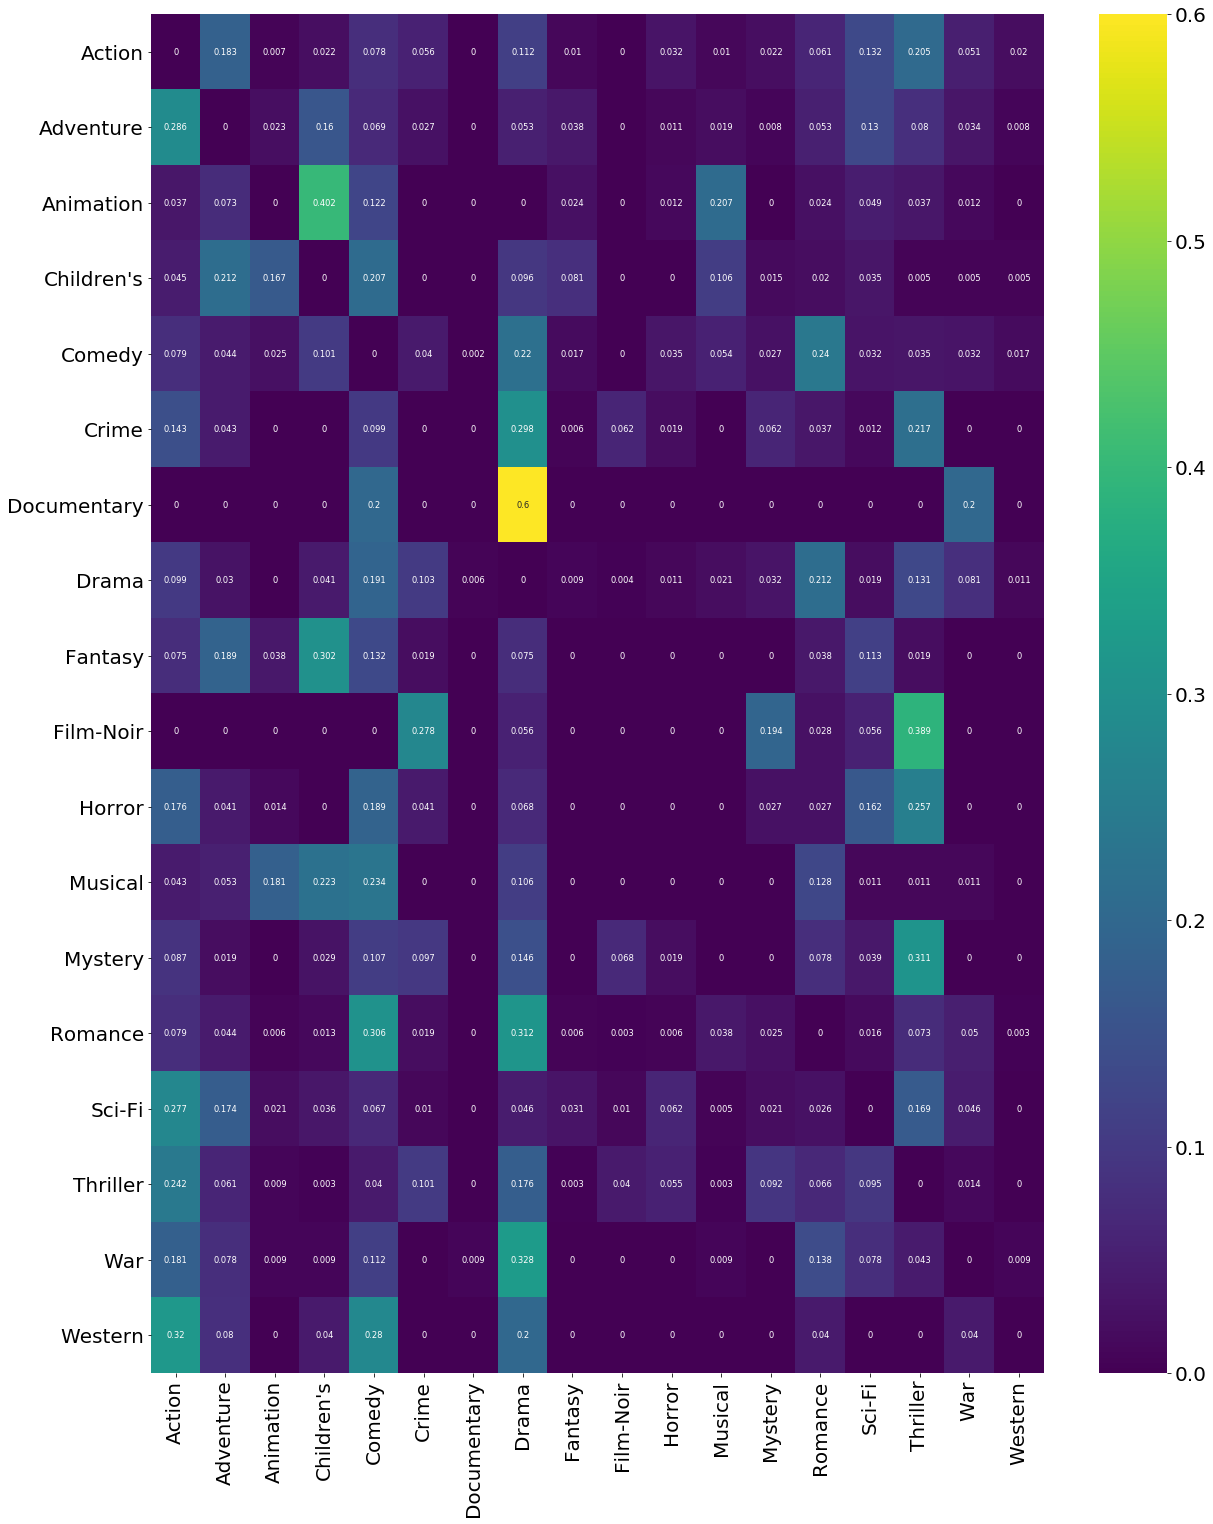

In [27]:
# construct genre graph
# create co-occurence matrix
coocc = genres.T.dot(genres)
np.fill_diagonal(coocc.values, 0)
frac_coocc = np.round(coocc / coocc.sum(axis = 1)[:, None], 3)
frac_coocc = frac_coocc.drop('unknown', axis = 0)
frac_coocc = frac_coocc.drop('unknown', axis = 1)


# build corresponding heatmap
plt.figure(figsize = (20, 25))
sns.heatmap(frac_coocc, annot=True, cmap='viridis', fmt="g", annot_kws={"fontsize":"small"})
plt.show()

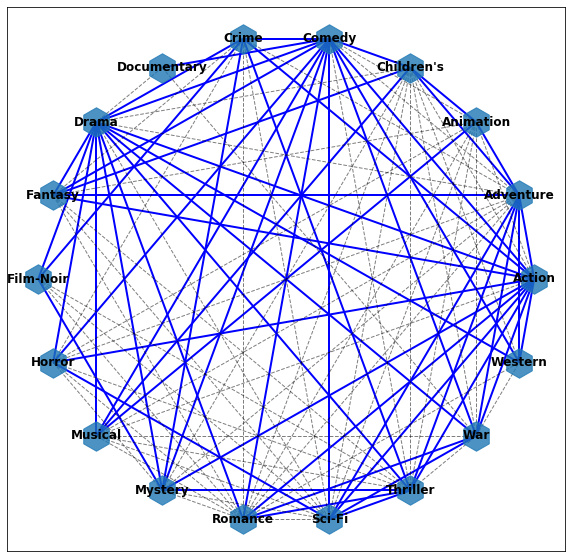

In [28]:
# build graph
plt.figure(figsize = (10, 10))
G = nx.from_pandas_adjacency(frac_coocc)
pos = nx.circular_layout(G)
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] > frac_coocc.values.mean()]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <= frac_coocc.values.mean()]

# nodes
nx.draw_networkx_nodes(G, pos, node_size=870, alpha = 0.8, node_shape = 'h')
# labels
nx.draw_networkx_labels(G, pos, font_size = 12, font_family='sans-serif', font_weight = 'bold')

# edges
nx.draw_networkx_edges(G, pos, edgelist = elarge, width = 2, edge_color = 'b')
nx.draw_networkx_edges(G, pos, edgelist = esmall, width = 1, alpha = 0.5, edge_color='black', style='dashed')

plt.show()

In [29]:
# filter out those below the mean value
frac_coocc_filtered = pd.DataFrame(np.where(frac_coocc.values < frac_coocc.values.mean(), 0, frac_coocc.values))
frac_coocc_filtered.index = frac_coocc.index
frac_coocc_filtered.columns = frac_coocc.index
frac_coocc_filtered

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Action,0.000,0.183,0.000,0.000,0.078,0.056,0.0,0.112,0.000,0.000,0.000,0.000,0.000,0.061,0.132,0.205,0.000,0.0
Adventure,0.286,0.000,0.000,0.160,0.069,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.130,0.080,0.000,0.0
Animation,0.000,0.073,0.000,0.402,0.122,0.000,0.0,0.000,0.000,0.000,0.000,0.207,0.000,0.000,0.000,0.000,0.000,0.0
Children's,0.000,0.212,0.167,0.000,0.207,0.000,0.0,0.096,0.081,0.000,0.000,0.106,0.000,0.000,0.000,0.000,0.000,0.0
Comedy,0.079,0.000,0.000,0.101,0.000,0.000,0.0,0.220,0.000,0.000,0.000,0.000,0.000,0.240,0.000,0.000,0.000,0.0
Crime,0.143,0.000,0.000,0.000,0.099,0.000,0.0,0.298,0.000,0.062,0.000,0.000,0.062,0.000,0.000,0.217,0.000,0.0
Documentary,0.000,0.000,0.000,0.000,0.200,0.000,0.0,0.600,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.200,0.0
Drama,0.099,0.000,0.000,0.000,0.191,0.103,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.212,0.000,0.131,0.081,0.0
Fantasy,0.075,0.189,0.000,0.302,0.132,0.000,0.0,0.075,0.000,0.000,0.000,0.000,0.000,0.000,0.113,0.000,0.000,0.0
Film-Noir,0.000,0.000,0.000,0.000,0.000,0.278,0.0,0.056,0.000,0.000,0.000,0.000,0.194,0.000,0.056,0.389,0.000,0.0


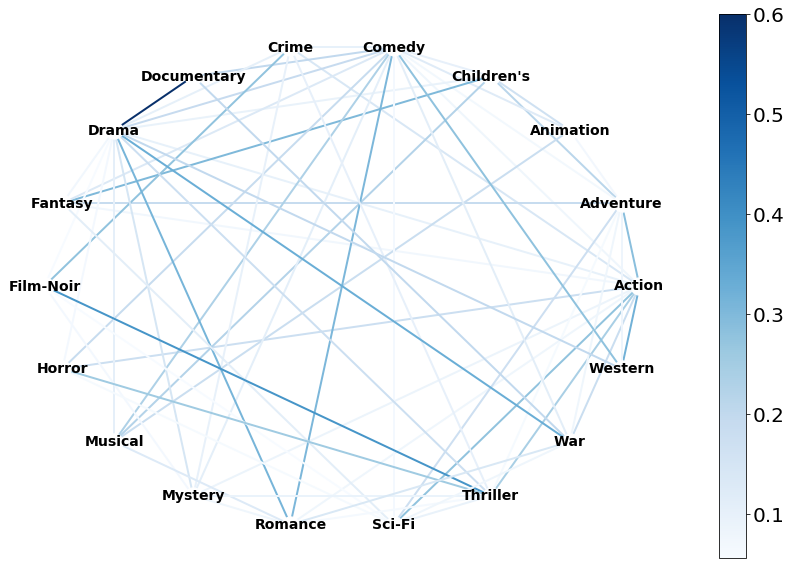

In [30]:
plt.figure(figsize = (15, 10))
G = nx.from_pandas_adjacency(frac_coocc_filtered)
pos = nx.circular_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw_networkx_nodes(G, pos, node_size=870, alpha = 0, node_shape = 'h')
nx.draw_networkx_labels(G, pos, font_size = 14, font_family='sans-serif', font_weight = 'bold')
nx.draw(G, pos, node_color='w', edgelist = edges, edge_color = weights, width = 2, edge_cmap = plt.cm.Blues)
sm = plt.cm.ScalarMappable(cmap = plt.cm.Blues, norm=plt.Normalize(vmin=min(weights), vmax = max(weights)))
plt.colorbar(sm)
plt.show()

- From the graph above, most genres do not appear jointly. 
- The most apparent pair that two genres co-occur is documentary and drama with the edge weight equal to 0.6. 

Similarly, we build graphs based on the correlation between genres.

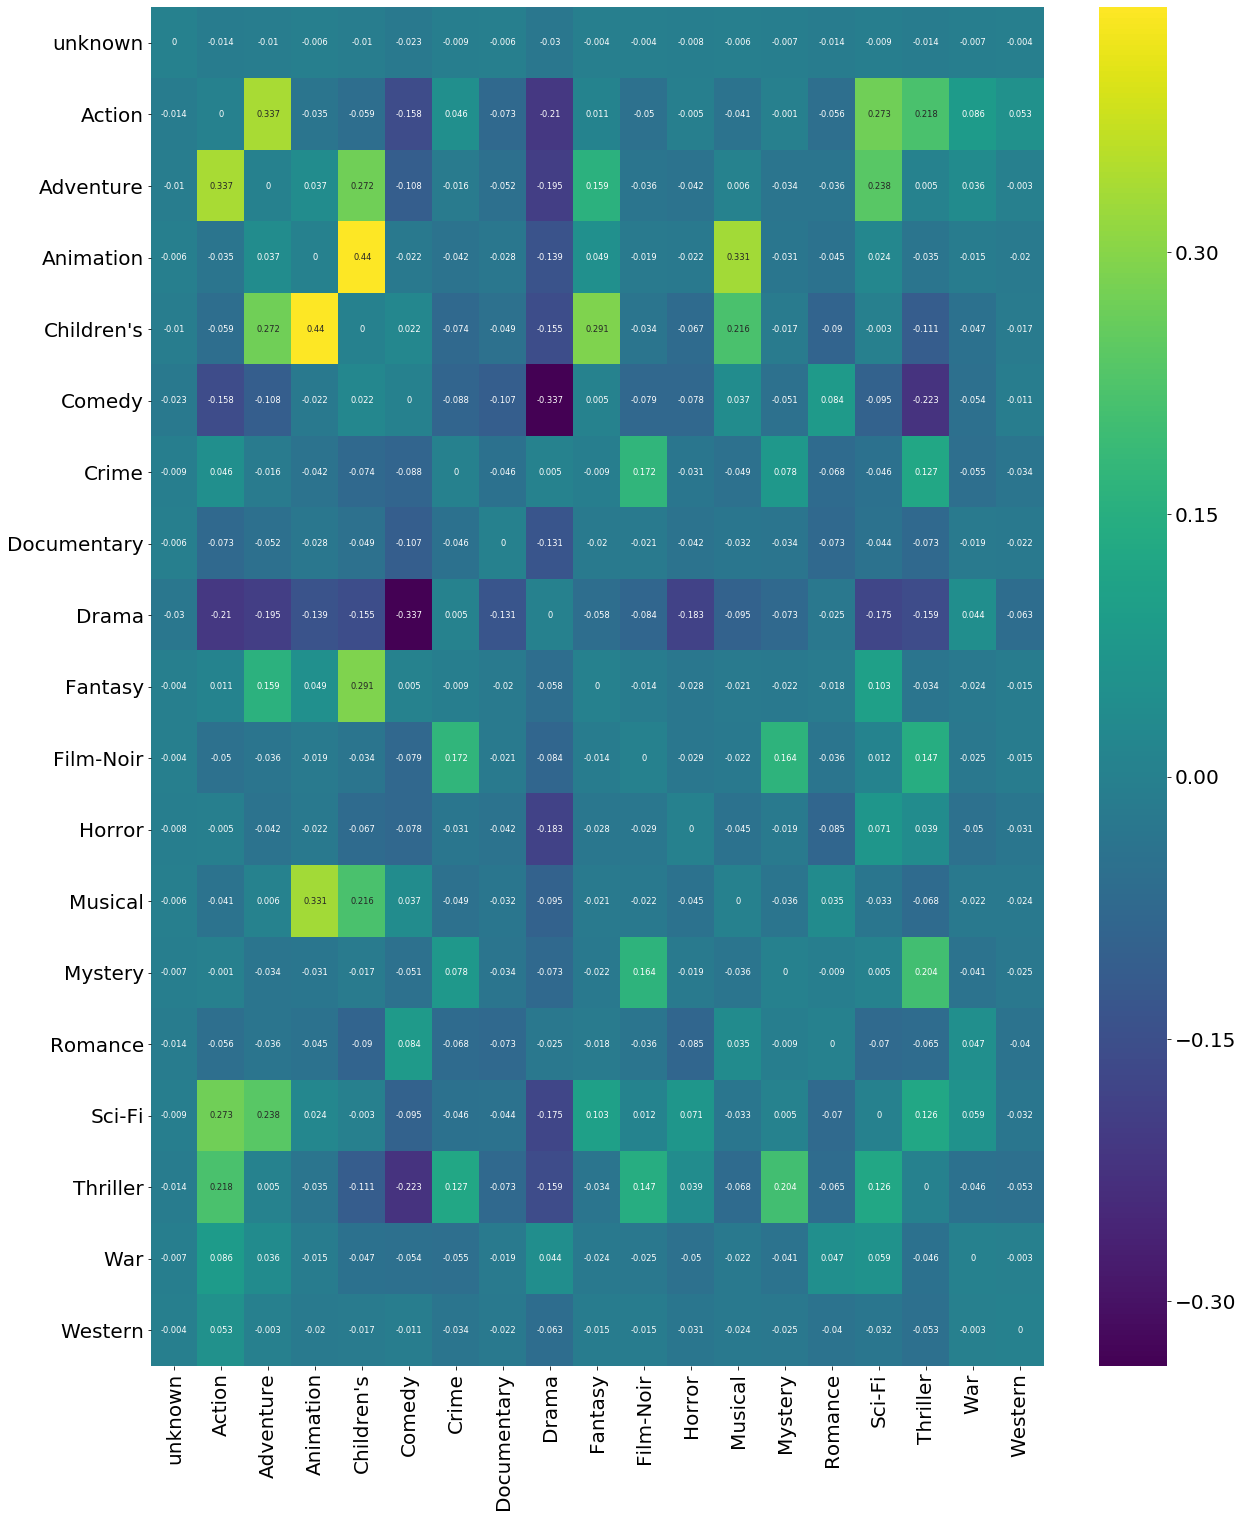

In [31]:
correlation = genres.corr()
np.fill_diagonal(correlation.values, 0)
frac_corr = np.round(correlation, 3)

# build corresponding heatmap
plt.figure(figsize = (20, 25))
sns.heatmap(frac_corr, annot=True, cmap='viridis', fmt="g", annot_kws={"fontsize":"small"})
plt.show()

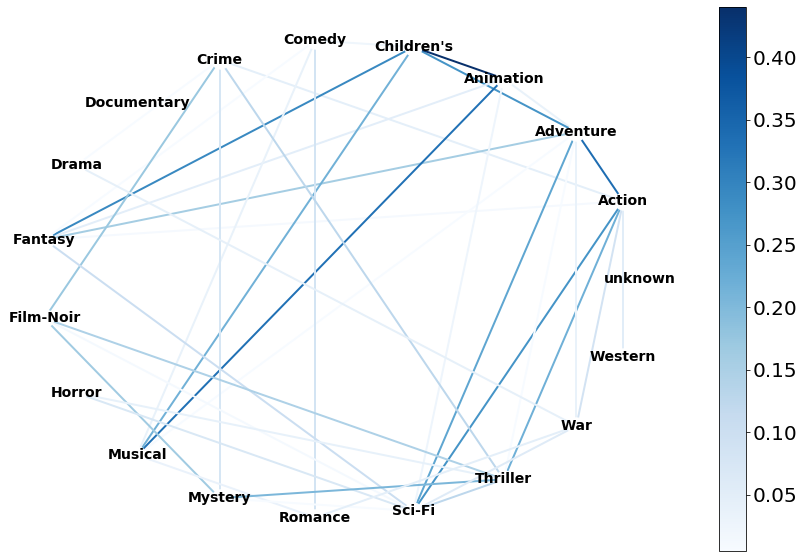

In [32]:
# build graph with only postive correlation
frac_corr_filtered = pd.DataFrame(np.where(frac_corr.values < 0, 0, frac_corr.values))
frac_corr_filtered.index = frac_corr.index
frac_corr_filtered.columns = frac_corr.index
frac_corr_filtered

plt.figure(figsize = (15, 10))
G = nx.from_pandas_adjacency(frac_corr_filtered)
pos = nx.circular_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw_networkx_nodes(G, pos, node_size=870, alpha = 0, node_shape = 'h')
nx.draw_networkx_labels(G, pos, font_size = 14, font_family='sans-serif', font_weight = 'bold')
nx.draw(G, pos, node_color='w', edgelist = edges, edge_color = weights, width = 2, edge_cmap = plt.cm.Blues)
sm = plt.cm.ScalarMappable(cmap = plt.cm.Blues, norm=plt.Normalize(vmin=min(weights), vmax = max(weights)))
plt.colorbar(sm)
plt.show()

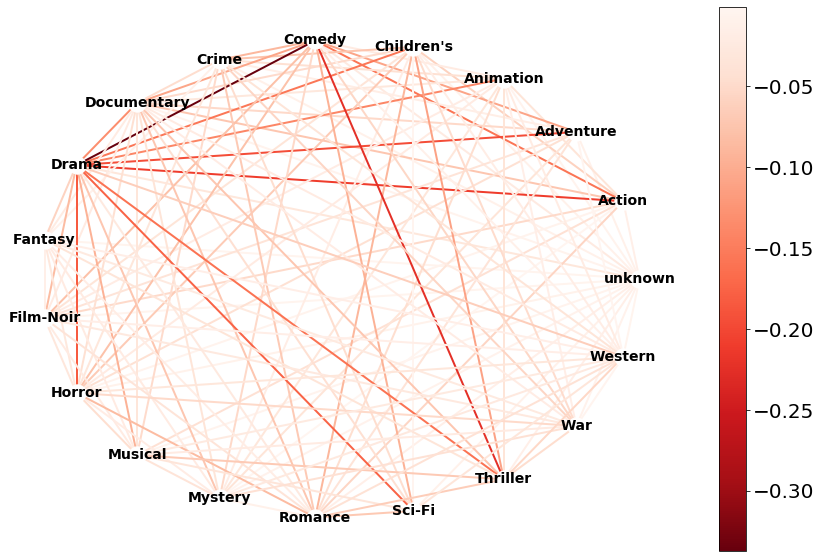

In [33]:
# build graph with only negative correlation
frac_corr_filtered = pd.DataFrame(np.where(frac_corr.values > 0, 0, frac_corr.values))
frac_corr_filtered.index = frac_corr.index
frac_corr_filtered.columns = frac_corr.index
frac_corr_filtered

plt.figure(figsize = (15, 10))
G = nx.from_pandas_adjacency(frac_corr_filtered)
pos = nx.circular_layout(G)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw_networkx_nodes(G, pos, node_size=870, alpha = 0, node_shape = 'h')
nx.draw_networkx_labels(G, pos, font_size = 14, font_family='sans-serif', font_weight = 'bold')
nx.draw(G, pos, node_color='w', edgelist = edges, edge_color = weights, width = 2, edge_cmap = plt.cm.Reds_r)
sm = plt.cm.ScalarMappable(cmap = plt.cm.Reds_r, norm=plt.Normalize(vmin=min(weights), vmax = max(weights)))
plt.colorbar(sm)
plt.show()

- In compliance with our intuition, the genres correlation graph from our data is what we expected.
- For example, the edge weight between Children's and Animation reflects the high positive correlation, and so does the one between Musical and Animation.
- As for the negative correlation graph, the edge weight between Drama and Comedy corresponds to the highest negative correlation.

Done with the movie graph. In the next step, we are going to build a graph that is related to users' occupation. The graph's nodes are user IDs while edges are calculated by users' occupation (one-hot vectors).

Mean Distance: 1.2812685911146753 



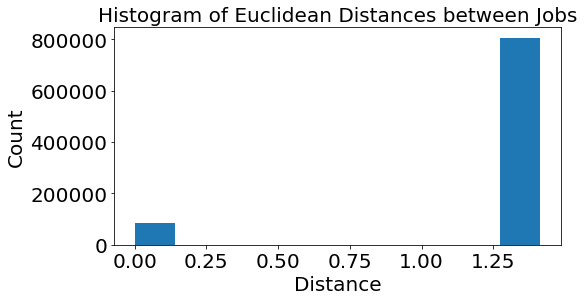

Adjacency Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]] 

Number of Edges: 41326 



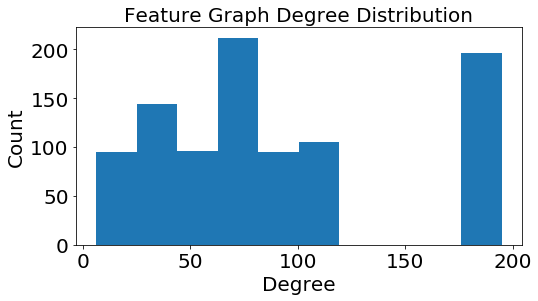


Variance of Feature Graph: 3794.696832945553 



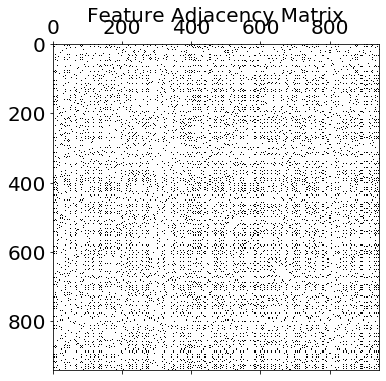

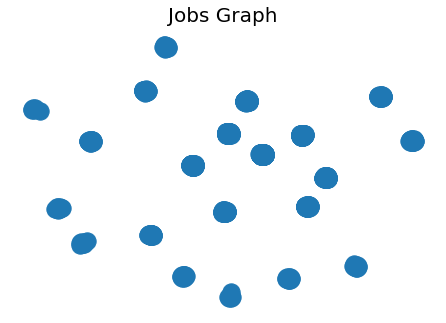

In [34]:
# user occupation graph
## transform users' occupation to vectors
user.occupation = user.occupation.astype('category')
jobs = pd.get_dummies(user.occupation)

## calculate distance matrix 
features = jobs.values
distance = np.sum(features**2, axis=1) + np.sum(features**2, axis=1)[:, np.newaxis] - 2 * np.dot(features, features.T)
distance = np.sqrt(distance)

## check mean distance
mean_distance = distance.mean()
print('Mean Distance:', mean_distance, '\n')

## plot the histogram of distance
plt.figure(1, figsize=(8, 4))
plt.hist(distance.flatten());
plt.title("Histogram of Euclidean Distances between Jobs")
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

## create adjacency matrix
threshold = mean_distance
A_feature = np.where(distance < threshold, 1, 0)
np.fill_diagonal(A_feature, 0)
print('Adjacency Matrix: \n', A_feature, '\n')

## check number of edges 
num_edges_feature = int(A_feature.sum() / 2)
print('Number of Edges:', num_edges_feature, '\n')

## plot degree distribution
degrees_feature = A_feature.sum(axis=1)
plt.figure(figsize = (8, 4))
plt.hist(degrees_feature)
plt.title('Feature Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

## variance of feature graph
feat_moment_1 = degrees_feature.mean()
feat_moment_2 = (degrees_feature**2).mean()
feat_variance = feat_moment_2 - feat_moment_1**2
print(f"\nVariance of Feature Graph: {feat_variance} \n")

## plot adjacency matrix
plt.figure(figsize = (6, 6))
plt.spy(A_feature)
plt.title('Feature Adjacency Matrix')
plt.show()

## show graph
G = nx.from_numpy_array(A_feature)
nx.draw_spring(G)
plt.title('Jobs Graph')
plt.show()

In [35]:
# save graph
nx.write_gexf(G,'Graph_Jobs.gexf')

- From the job graph, we notice that users with the same job form their own cluster, and there is no edges connected between different clusters.
- Same reason as the movie graph, we will visualize the users' occupation graph in Gephi.

We could see that most ratings are done by students. Nonetheless, students are more picky to give higher rating compared with other high-social-status job roles such as lawyers, doctors, and scientists.